# Prediction using Decision Tree Algorithm

## Name: Onkar Chendage
### Github: https://github.com/onkarr19
### Kaggle: https://www.kaggle.com/onkarr19


In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('Iris.csv').set_index('Id')
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = dataset.iloc[:,:-1]

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [5]:
dataset["Species"] = dataset["Species"].astype('category')
dataset.dtypes

SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species          category
dtype: object

In [6]:
dataset["Label"] = dataset["Species"].cat.codes
y = dataset.Label.to_list()

In [7]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df.values,y)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


### Tree Visualization



In [8]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [9]:
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

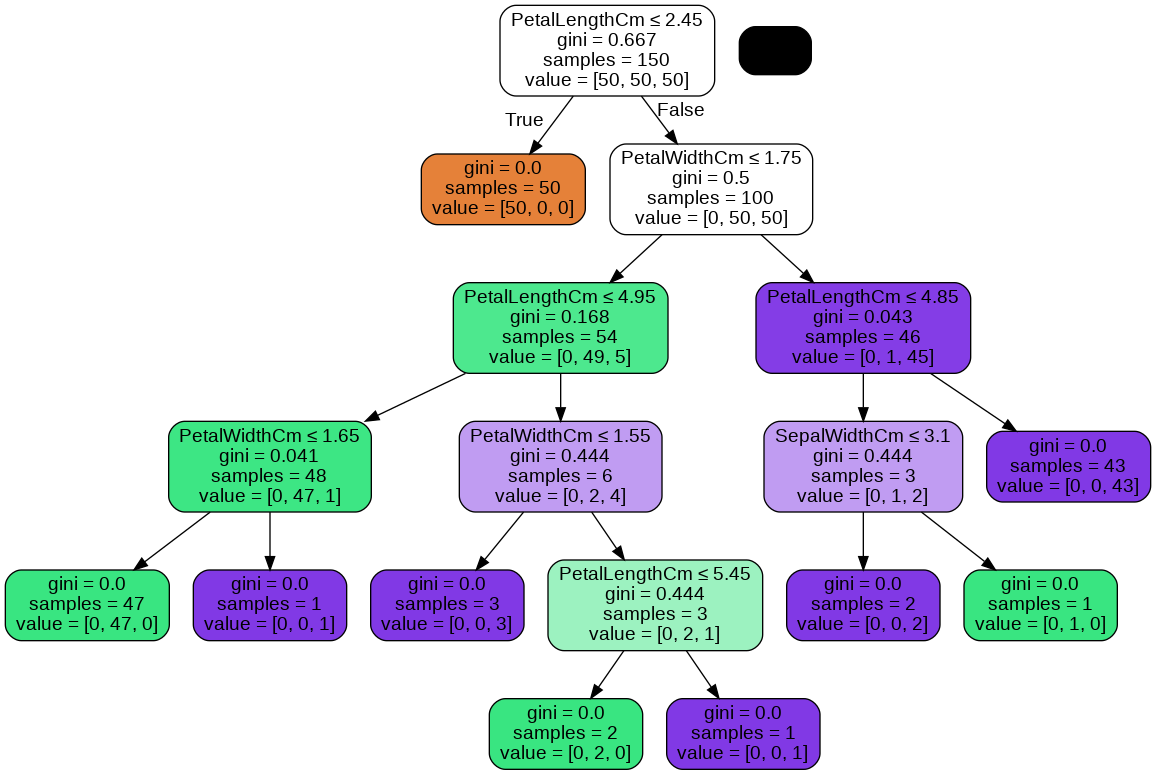

In [10]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=df.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Prediction

In [11]:
predict_on = [[5.3, 3, 4, 1.5], [ 5.5, 2.2, 4.8, 1.82 ], [ 3.3, 2.5, 1.6, 0.9 ]]
pred = dtree.predict(predict_on)
pred

array([1, 2, 0])

In [12]:
print('Species Prediction of iris flower having')

for i in range(len(pred)):
  print(f'''\tSepalLength: {predict_on[i][0]}Cm, SepalWidth: {predict_on[i][1]}Cm, PetalLength: {predict_on[i][2]}Cm, PetalWidth: {predict_on[i][3]}Cm => {dataset.Species.cat.categories[pred[i]]}''')

Species Prediction of iris flower having
	SepalLength: 5.3Cm, SepalWidth: 3Cm, PetalLength: 4Cm, PetalWidth: 1.5Cm => Iris-versicolor
	SepalLength: 5.5Cm, SepalWidth: 2.2Cm, PetalLength: 4.8Cm, PetalWidth: 1.82Cm => Iris-virginica
	SepalLength: 3.3Cm, SepalWidth: 2.5Cm, PetalLength: 1.6Cm, PetalWidth: 0.9Cm => Iris-setosa
